In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
X_test.shape

(10000, 28, 28)

In [0]:
y_train.shape

(60000,)

In [0]:
y_test.shape

(10000,)

0  :  5923
1  :  6742
2  :  5958
3  :  6131
4  :  5842
5  :  5421
6  :  5918
7  :  6265
8  :  5851
9  :  5949


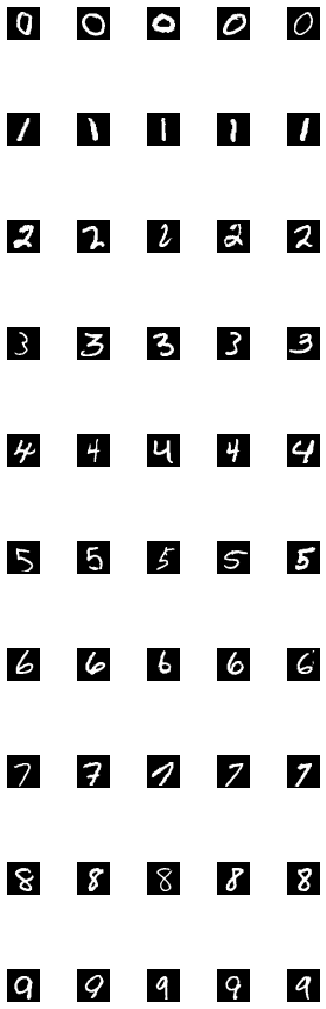

In [0]:
fig, axes = plt.subplots(nrows = 10, ncols = 5, figsize=(5,15))
fig.tight_layout()
for i in range(10):
    for j in range(5):
        img = X_train[y_train==i][np.random.randint(0,len(X_train[y_train==i]))]
        axes[i][j].imshow(img, cmap='gray')
        axes[i][j].axis('off')
    print(i, ' : ', len(X_train[y_train==i]))

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28,28,1)

In [0]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
X_test.shape

(10000, 28, 28, 1)

In [0]:
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [0]:
y_train.shape

(60000, 10)

In [0]:
y_test.shape

(10000, 10)

In [0]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), strides=1, activation='relu', input_shape=(28,28,1)))
model.add(Dropout(0.3))
model.add(Conv2D(32, kernel_size=(3,3), strides=1, activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D((2,2), strides=2))
model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
dropout_4 (Dropout)          (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
dropout_5 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)              

In [0]:
h = model.fit(X_train, y_train, epochs=15, batch_size=100, validation_split=0.1, verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 13s 250us/step - loss: 0.4159 - acc: 0.8735 - val_loss: 0.0619 - val_acc: 0.9833
Epoch 2/15
54000/54000 [==============================] - 13s 235us/step - loss: 0.1210 - acc: 0.9681 - val_loss: 0.0464 - val_acc: 0.9878
Epoch 3/15
54000/54000 [==============================] - 13s 233us/step - loss: 0.0885 - acc: 0.9779 - val_loss: 0.0387 - val_acc: 0.9893
Epoch 4/15
54000/54000 [==============================] - 13s 232us/step - loss: 0.0728 - acc: 0.9808 - val_loss: 0.0379 - val_acc: 0.9900
Epoch 5/15
54000/54000 [==============================] - 13s 233us/step - loss: 0.0596 - acc: 0.9852 - val_loss: 0.0345 - val_acc: 0.9902
Epoch 6/15
54000/54000 [==============================] - 13s 234us/step - loss: 0.0495 - acc: 0.9869 - val_loss: 0.0398 - val_acc: 0.9903
Epoch 7/15
54000/54000 [==============================] - 13s 232us/step - loss: 0.0468 - acc: 0.9881 - val_loss: 0.0

In [0]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 97us/step


[0.04281269009268108, 0.9895]

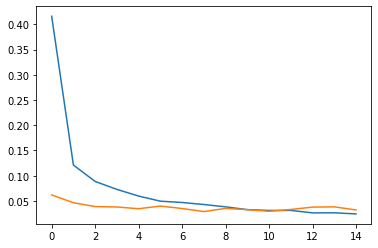

In [0]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

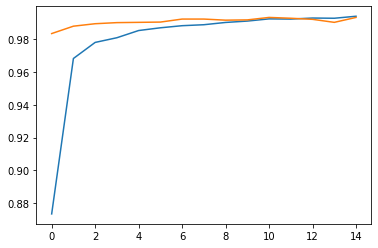

In [0]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])